# Revenue Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Exploratory Data Analysis

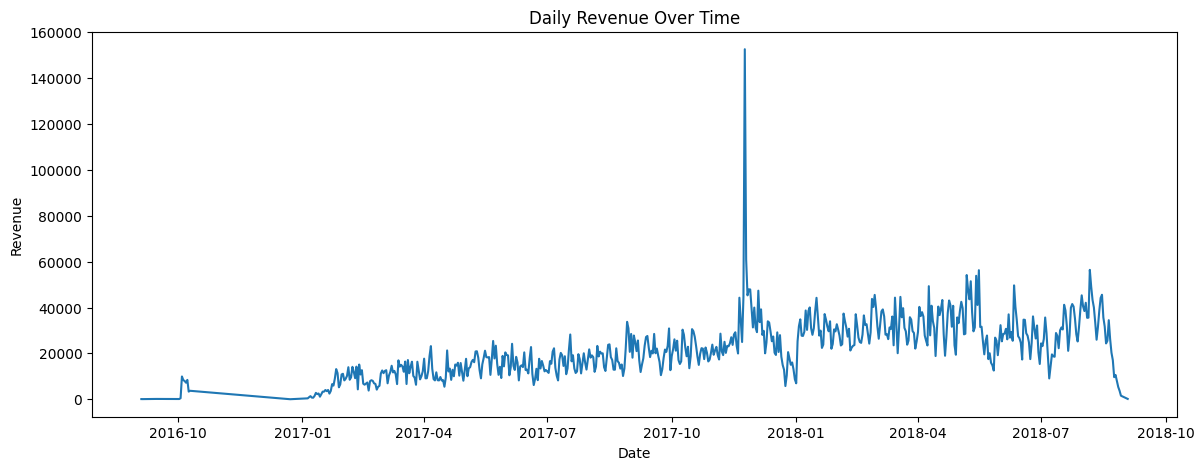

In [2]:
# Load daily revenue
df = pd.read_csv("../data/daily_revenue.csv", parse_dates=["date"])
df.set_index("date", inplace=True)

# Plot garis revenue harian
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x=df.index, y="daily_revenue")
plt.title("Daily Revenue Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

- Revenue tertinggi terjadi pada akhir tahun 2017
- Semakin hari revenuenya meningkat

### Smoothing

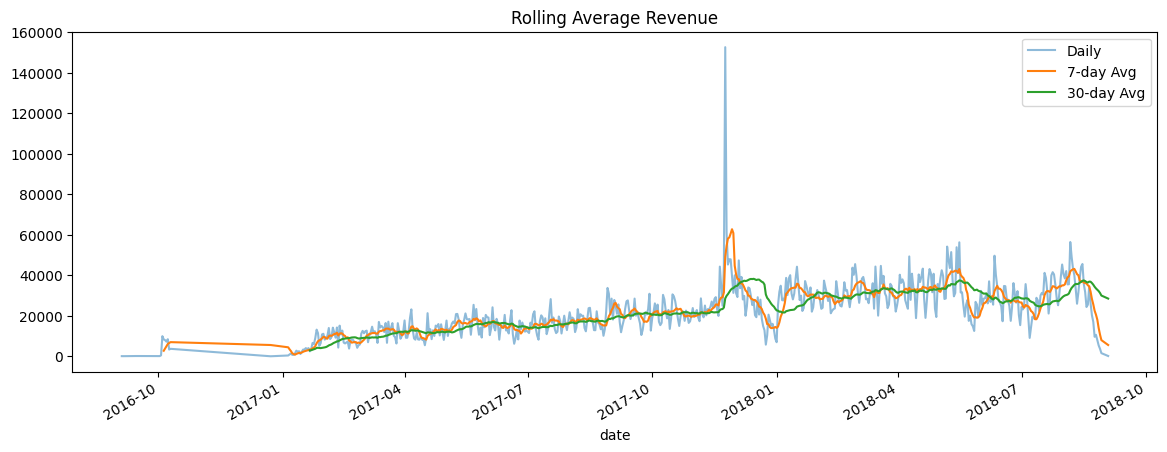

In [3]:
df['rolling_7'] = df['daily_revenue'].rolling(window=7).mean()
df['rolling_30'] = df['daily_revenue'].rolling(window=30).mean()

plt.figure(figsize=(14,5))
df['daily_revenue'].plot(alpha=0.5, label="Daily")
df['rolling_7'].plot(label="7-day Avg")
df['rolling_30'].plot(label="30-day Avg")
plt.legend()
plt.title("Rolling Average Revenue")
plt.show()

- Terlihat dengan rolling 7-day bahwa kenaikan tertinggi pada akhir tahun 2017 tetapi langsung mengalami penurunan pada awal 2018
- Terlihat dengan rolling 30-day bahwa revenue terus meningkat setiap waktunya

### Pola Bulanan & Mingguan

<Axes: title={'center': 'Monthly Avg Revenue'}, xlabel='month'>

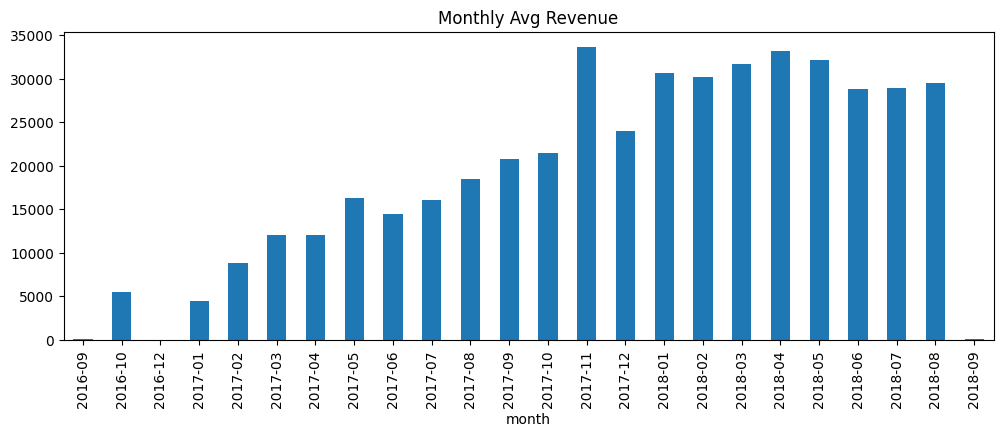

In [5]:
df['month'] = df.index.to_period('M')

# Rata-rata per bulan
monthly_avg = df.groupby('month')['daily_revenue'].mean()
monthly_avg.plot(kind='bar', figsize=(12,4), title='Monthly Avg Revenue')

Akan tetapi, secara rata-rata didapatkan bahwa kenaikan revenue bulanan tertinggi terjadi pada November 2017 dan menurun kembali pada Desember 2017

<Axes: title={'center': 'Avg Revenue by Day of Week'}, xlabel='dayofweek'>

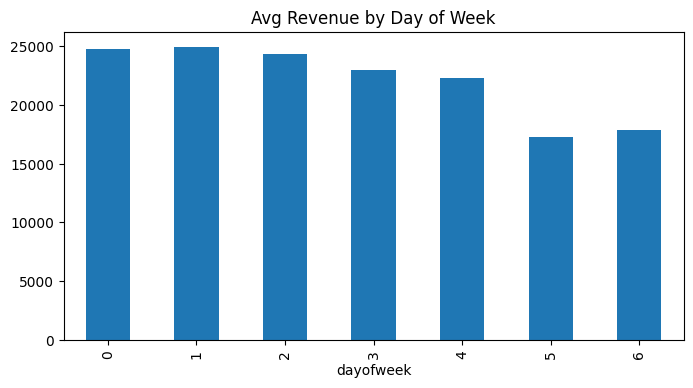

In [6]:
df['dayofweek'] = df.index.dayofweek

# Rata-rata per hari (0 = Monday)
dow_avg = df.groupby('dayofweek')['daily_revenue'].mean()
dow_avg.plot(kind='bar', figsize=(8,4), title='Avg Revenue by Day of Week')

Ketika melihat pola penjualan mingguan, didapat bahwa revenue semakin menurun hingga paling rendah pada weekend

### Seasonal Decomposition

<Figure size 1400x1000 with 0 Axes>

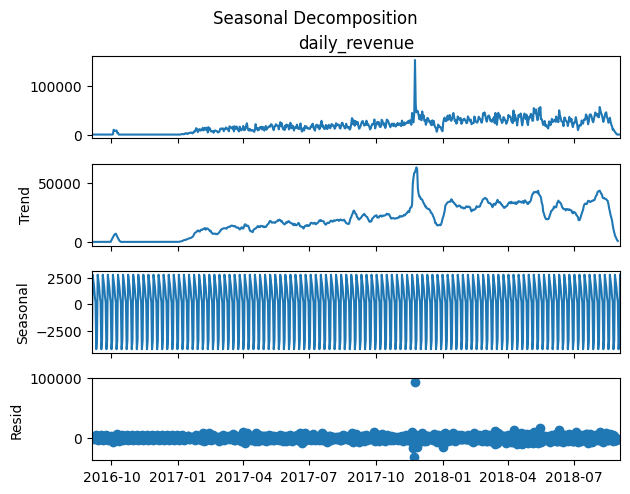

In [17]:
# Untuk decomposition, pastikan time series lengkap dan resampled
df_full = df['daily_revenue'].asfreq('D').fillna(0)

plt.figure(figsize=(14,10))
result = seasonal_decompose(df_full, model='additive')
result.plot()
plt.suptitle("Seasonal Decomposition", y=1.02)  # Tambahkan y agar judul tidak bertabrakan
plt.show()

- Seasonal: Ada pola pembelian berulang yang turun pada akhir pekan
- Residu: Ada kejadian khusus pada November 2017 yang menyebabkan lonjakan sangat tinggi